<a href="https://colab.research.google.com/github/Bhavya05shah/RL_maze/blob/main/RL_maze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


In [9]:
class Maze:
    def __init__(self, maze, start_position, goal_position):
        self.maze = maze
        self.maze_height = maze_layout.shape[0] # Get the height of the maze (number of rows)
        self.maze_width = maze_layout.shape[1]  # Get the width of the maze (number of columns)
        self.start_position = start_position    # Set the start position in the maze as a tuple (x, y)
        self.goal_position = goal_position      # Set the goal position in the maze as a tuple (x, y)

    def show_maze(self):
        # Visualizing the maze
        plt.figure(figsize=(5,5))
        plt.imshow(self.maze, cmap='gray')

        # Adding start and goal positions to the maze
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[0], self.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

        # Removing ticks and labels
        plt.xticks([]), plt.yticks([])
        plt.show()


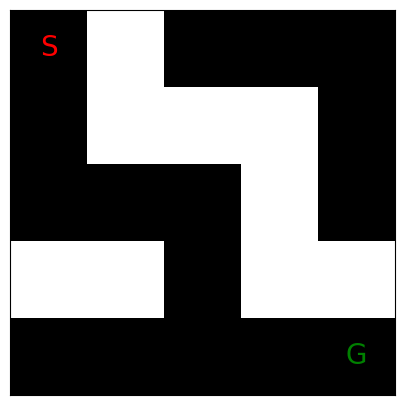

In [10]:
# Create any maze layout you'd like, here's an example
maze_layout = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0]
])

# Create an instance of the maze and set the starting and ending positions
maze = Maze(maze_layout, (0, 0), (4, 4))
# Visualize the maze
maze.show_maze()

In [11]:
actions = [(-1, 0), # Up: Moving one step up, reducing the row index by 1
          (1, 0),   # Down: Moving on step down, increasing the row index by 1
          (0, -1),  # Left: Moving one step to the left, reducing the column index by 1
          (0, 1)]   # Right: Moving one step to the right, increasing the column index by 1

class QLearningAgent:
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01, num_episodes=100):
        # Initialize a Q-table containing all zeros
        self.q_table = np.zeros((maze.maze_height, maze.maze_width, 4)) # 4 actions: Up, Down, Left, Right
        self.learning_rate = learning_rate          # Learning rate controls how much the agent updates its Q-values after each action
        self.discount_factor = discount_factor      # Discount factor determines the importance of future rewards in the agent's decisions
        self.exploration_start = exploration_start  # Exploration rate determines the likelihood of the agent taking a random action
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes

    def get_exploration_rate(self, current_episode):
        # Calculating the current exploration rate
        exploration_rate = self.exploration_start * (self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)
        return exploration_rate

    def get_action(self, state, current_episode):
        exploration_rate = self.get_exploration_rate(current_episode)
        # Select the sate randomly (exploration) or using the Q-table (exploitation)
        if np.random.rand() < exploration_rate:
            return np.random.randint(4) # Choose a random action
        else:
            return np.argmax(self.q_table[state]) # State with highest Q value

    def update_q_table(self, state, action, next_state, reward):
        best_next_action = np.argmax(self.q_table[next_state])
        current_q_value = self.q_table[state][action]

        # Q-value updated
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)
        self.q_table[state][action] = new_q_value


In [12]:
#Here the reward system has been defined by its reward,penalty(which is of two types)
goal_reward = 100
wall_penalty = -10
step_penalty = -1

In [13]:
#For a single episode.

def finish_episode(agent, maze, current_episode, train=True):
    # Initialize the agent's current state to the maze's start position
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]

    # Loop of episodes
    while not is_done:
        action = agent.get_action(current_state, current_episode)
        next_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])

        # Checking if the next state is out of bounds or hitting a wall
        if next_state[0] < 0 or next_state[0] >= maze.maze_height or next_state[1] < 0 or next_state[1] >= maze.maze_width or maze.maze[next_state[1]][next_state[0]] == 1:
            reward = wall_penalty
            next_state = current_state
        # Checking if the agent has reached its goal:
        elif next_state == (maze.goal_position):
            path.append(current_state)
            reward = goal_reward
            is_done = True
        # The agent takes a step but hasn't reached the goal yet
        else:
            path.append(current_state)
            reward = step_penalty

        # Update the cumulative reward and step count for that episode
        episode_reward += reward
        episode_step += 1

        # Update the agent's Q-table
        if train == True:
            agent.update_q_table(current_state, action, next_state, reward)
        current_state = next_state

    return episode_reward, episode_step, path
